# Case Study 14. Oysters

The ...

In [2]:
install.packages("s20x")
library(s20x)

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)


In [3]:
data(oysters.df)
head(oysters.df)

Site,Oysters
GR,25
GR,24
GR,25
GR,14
GR,23
GR,24


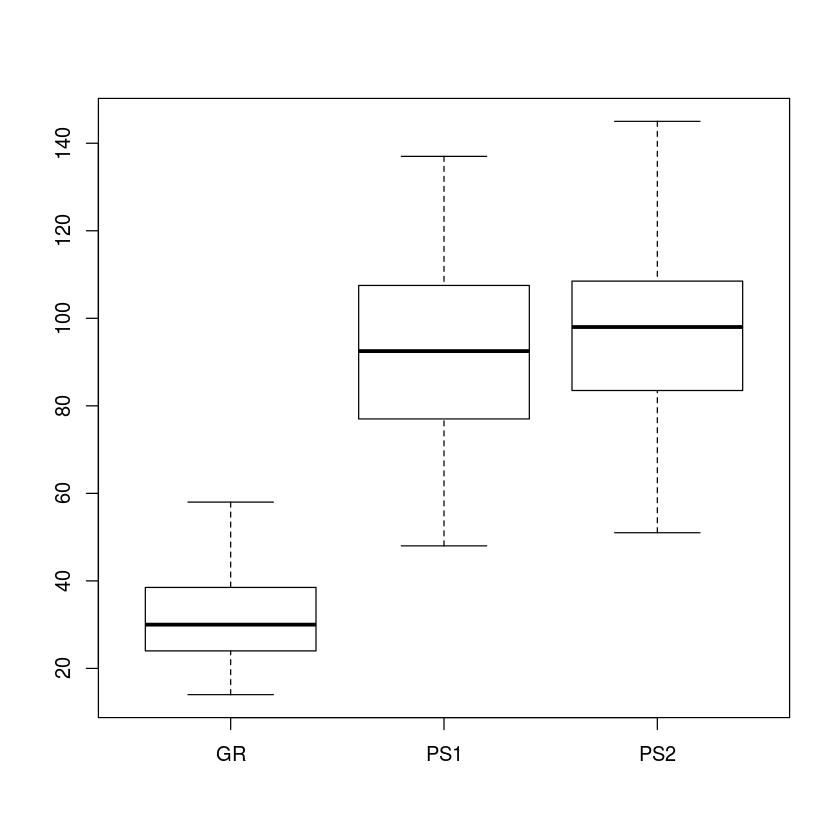

In [4]:
boxplot(Oysters ~ Site, data = oysters.df)

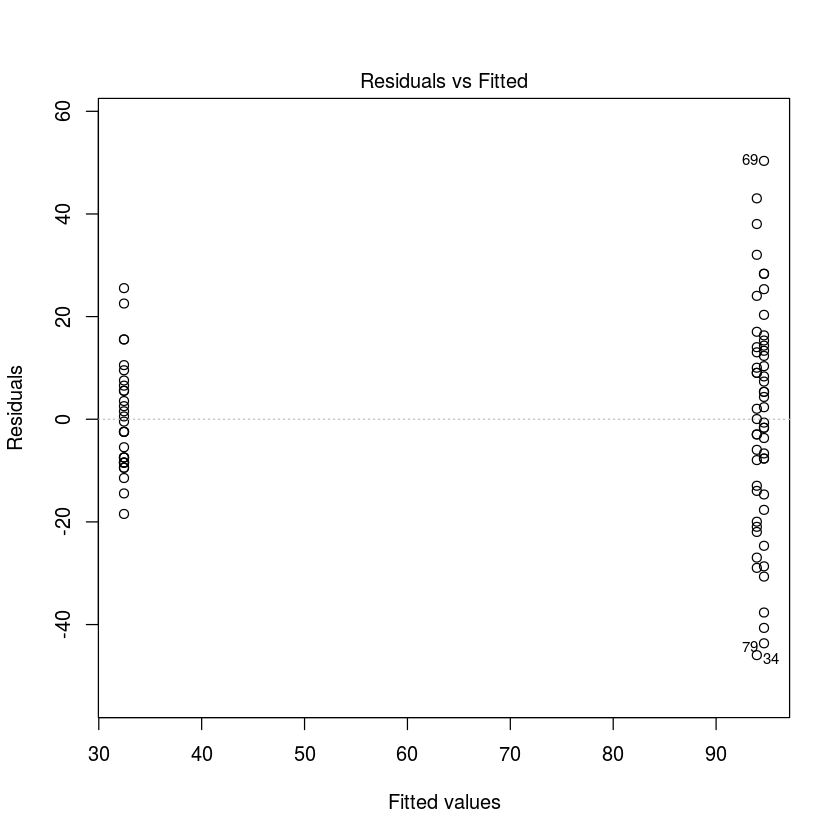

In [5]:
oysters.fit1 = lm(Oysters ~ Site, data = oysters.df)
eovcheck(oysters.fit1)

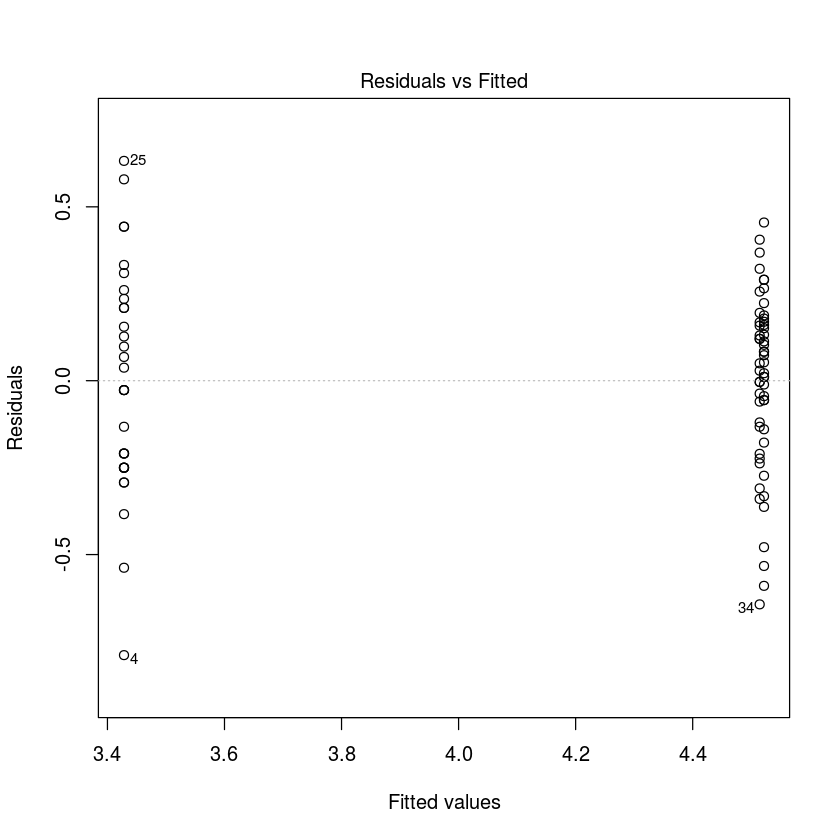

In [6]:
oysters.fit2 = lm(log(Oysters) ~ Site, data = oysters.df)
eovcheck(oysters.fit2)

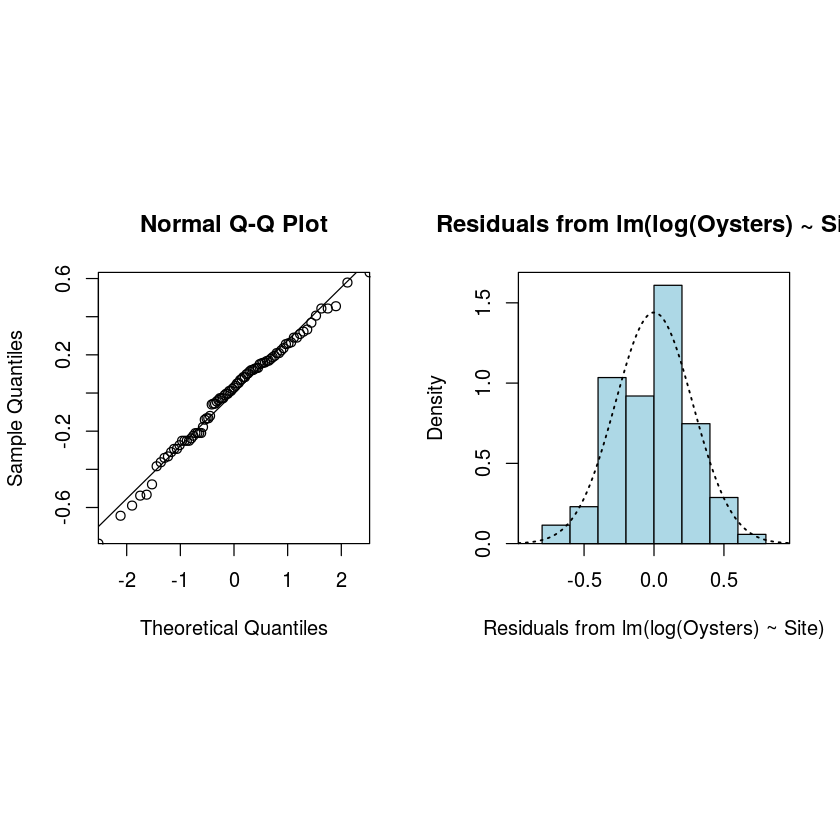

In [7]:
normcheck(oysters.fit2)

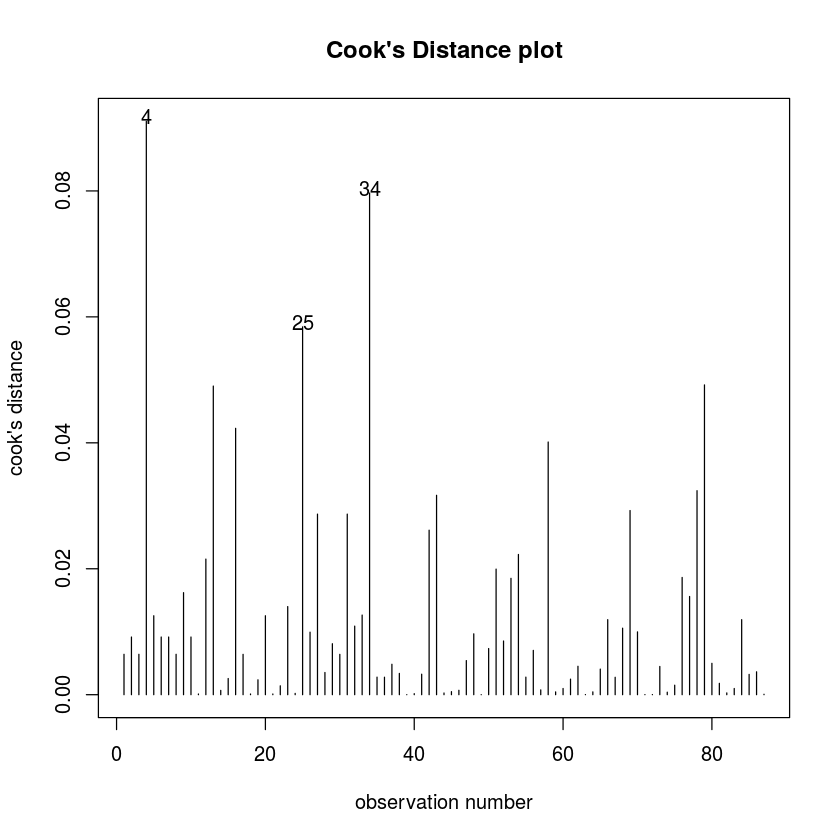

In [8]:
cooks20x(oysters.fit2)

In [9]:
summary(oysters.fit2)


Call:
lm(formula = log(Oysters) ~ Site, data = oysters.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78924 -0.20943  0.02883  0.17407  0.63214 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.42830    0.05034   68.11   <2e-16 ***
SitePS1      1.08616    0.07620   14.25   <2e-16 ***
SitePS2      1.09354    0.07063   15.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2803 on 84 degrees of freedom
Multiple R-squared:  0.7824,	Adjusted R-squared:  0.7772 
F-statistic:   151 on 2 and 84 DF,  p-value: < 2.2e-16


In [10]:
anova(oysters.fit2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Site,2,23.724524,11.86226220,151.0222,1.516922e-28
Residuals,84,6.597903,0.07854647,NA,NA


In [11]:
multipleComp(oysters.fit2)

,Estimate,Tukey.L,Tukey.U,Tukey.p
GR - PS1,-1.086160325,-1.2680,-0.9043,0.0000
GR - PS2,-1.093539532,-1.2621,-0.9250,0.0000
PS1 - PS2,-0.007379208,-0.1879,0.1732,0.9948


In [13]:
# There is no meaning to backtransforming the p-values, so we do not include that
# in the subset.
exp(multipleComp(oysters.fit2))[, 1:3]

,Estimate,Tukey.L,Tukey.U
GR - PS1,0.3375099,0.2813938,0.4048252
GR - PS2,0.3350285,0.2830590,0.3965314
PS1 - PS2,0.9926480,0.8286976,1.1891039


**Method and Assumption Checks**

**Executive Summary**

## Optional Commands

In [14]:
exp(-1 * multipleComp(oysters.fit2))[, 1:3]

,Estimate,Tukey.L,Tukey.U
GR - PS1,2.962876,3.553738,2.4702022
GR - PS2,2.984820,3.532833,2.5218683
PS1 - PS2,1.007407,1.206713,0.8409694
